# Stock Forecasting Project
*by JackDeBuff*

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Data Retrieving Zone**

In [0]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import date
import urllib
from bs4 import BeautifulSoup
from time import sleep
import copy

today = date.today()
#today = '2019-09-27'
print("Today's date:", today)

Today's date: 2019-10-02


In [0]:
def retrieve(name,start,end,typeof,amount):
  try:
      data = pdr.get_data_yahoo(name, start=start, end=end)
      #print(data.head(10))
      x = list(data[typeof])[-amount:]
      return x
  except:
      print("Error:", sys.exc_info()[0])
      print("Description:", sys.exc_info()[1])

In [0]:
stock_name_list = []

url = 'https://www.settrade.com/C13_MarketSummary.jsp?detail=SETHD'
html = urllib.request.urlopen(url).read() 
soup = BeautifulSoup(html, 'html.parser')
fuck = soup.find('html').find_next('html').find_all('tr')

for i in range(1,31):
  name = fuck[i].a.text + '.BK'
  stock_name_list.append(name)
print(stock_name_list)

['ADVANC.BK', 'ANAN.BK', 'AP.BK', 'BCP.BK', 'BEAUTY.BK', 'BLAND.BK', 'HANA.BK', 'INTUCH.BK', 'IRPC.BK', 'JMT.BK', 'KCE.BK', 'KKP.BK', 'KTB.BK', 'LH.BK', 'MAJOR.BK', 'ORI.BK', 'PTT.BK', 'PTTGC.BK', 'QH.BK', 'RATCH.BK', 'SCB.BK', 'SCC.BK', 'SGP.BK', 'SIRI.BK', 'SPRC.BK', 'TCAP.BK', 'TISCO.BK', 'TOP.BK', 'TTW.BK', 'TVO.BK']


**Data Control Centre**

In [0]:
"""Close = list(ptt['Close'])[-2000:]
print(Close[-10:])
print(len(Close))"""

startdate = "2007-01-01"
amount = 3100
count = 0

for i in [stock_name_list[0]]:
  High = retrieve(i,startdate,today,'High',amount)
  Low = retrieve(i,startdate,today,'Low',amount)
  Open = retrieve(i,startdate,today,'Open',amount)
  Close = retrieve(i,startdate,today,'Close',amount)
  Volume = retrieve(i,startdate,today,'Volume',amount)
  stock = [[]]
  for j in range(3100):
    stock[stock_name_list.index(i)].append([Close[j],Open[j],High[j],Low[j],Volume[j]])
  count += 1

print(len(Close))
print(Close)
print(len(stock[0]))
print(stock[0])

3100
[72.0, 73.0, 74.0, 73.0, 74.5, 76.0, 76.0, 77.0, 80.0, 82.0, 84.5, 83.0, 82.5, 82.0, 76.5, 77.5, 77.5, 77.0, 75.5, 75.5, 75.5, 74.0, 73.0, 74.0, 74.5, 74.5, 73.0, 73.5, 73.0, 72.5, 72.5, 72.0, 72.5, 72.5, 72.0, 72.0, 73.0, 72.5, 72.5, 72.5, 71.0, 69.5, 70.5, 67.0, 68.0, 72.5, 75.0, 73.5, 71.5, 71.0, 72.0, 72.0, 74.0, 74.5, 74.0, 74.0, 73.0, 73.0, 74.5, 74.5, 75.5, 75.5, 78.0, 82.0, 86.0, 87.5, 85.5, 85.5, 85.5, 89.5, 91.0, 93.0, 90.0, 89.0, 86.0, 86.0, 90.0, 87.5, 86.5, 87.0, 87.5, 90.0, 90.5, 90.5, 90.0, 90.5, 90.0, 87.0, 89.5, 86.0, 82.0, 82.5, 83.0, 88.0, 87.5, 89.5, 88.0, 86.5, 85.0, 85.0, 84.5, 86.5, 85.0, 87.5, 89.0, 90.5, 90.0, 89.5, 91.0, 93.5, 93.0, 94.0, 95.5, 95.0, 95.0, 96.5, 97.0, 99.0, 98.5, 103.0, 103.0, 102.0, 98.5, 98.5, 95.0, 97.0, 99.0, 98.5, 98.5, 100.0, 97.0, 97.5, 97.0, 93.0, 86.5, 89.0, 91.5, 92.0, 94.0, 94.5, 91.5, 89.5, 89.5, 89.0, 89.5, 93.0, 93.0, 92.0, 91.5, 92.5, 89.0, 87.0, 88.0, 89.0, 89.0, 90.5, 89.0, 87.5, 85.5, 85.5, 87.0, 89.5, 90.0, 90.5, 90.0, 

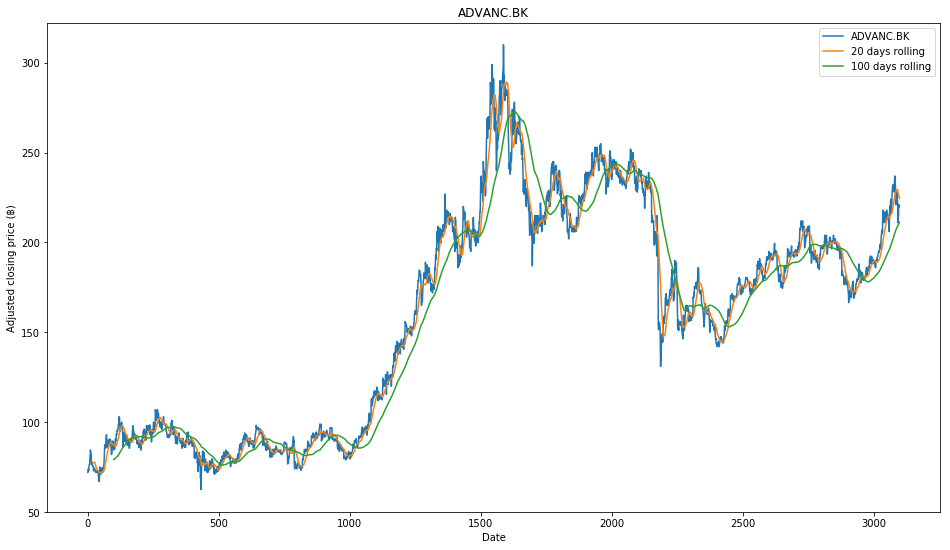

In [0]:
i = 'ADVANC.BK'
data = {'price': Close}
msft = pd.DataFrame(data)


  #msft = close.loc[:, 'MSFT']

  # Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
  #print(list(short_rolling_msft['price']))
long_rolling_msft = msft.rolling(window=100).mean()


  # Plot everything by leveraging the very powerful matplotlib package
plt.figure(figsize=(16,9))
  #plt.subplots(figsize=(16,9))
plt.title(i)
plt.plot(msft.index, msft, label=i)
plt.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
plt.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

plt.xlabel('Date')
plt.ylabel('Adjusted closing price (฿)')
plt.legend()
plt.show()

In [0]:
"""or i in stock_name_list:
  Close = retrieve(i,startdate,today,'Close',amount)
  data = {'price': Close}

  msft = pd.DataFrame(data)


  #msft = close.loc[:, 'MSFT']

  # Calculate the 20 and 100 days moving averages of the closing prices
  short_rolling_msft = msft.rolling(window=20).mean()
  #print(list(short_rolling_msft['price']))
  long_rolling_msft = msft.rolling(window=100).mean()


  # Plot everything by leveraging the very powerful matplotlib package
  plt.figure(figsize=(16,9))
  #plt.subplots(figsize=(16,9))
  plt.title(i)
  plt.plot(msft.index, msft, label=i)
  plt.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
  plt.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

  plt.xlabel('Date')
  plt.ylabel('Adjusted closing price (฿)')
  plt.legend()
  plt.savefig('/content/drive/My Drive/Colab Notebooks/SETHD3000/'+i+'.png')"""

"or i in stock_name_list:\n  Close = retrieve(i,startdate,today,'Close',amount)\n  data = {'price': Close}\n\n  msft = pd.DataFrame(data)\n\n\n  #msft = close.loc[:, 'MSFT']\n\n  # Calculate the 20 and 100 days moving averages of the closing prices\n  short_rolling_msft = msft.rolling(window=20).mean()\n  #print(list(short_rolling_msft['price']))\n  long_rolling_msft = msft.rolling(window=100).mean()\n\n\n  # Plot everything by leveraging the very powerful matplotlib package\n  plt.figure(figsize=(16,9))\n  #plt.subplots(figsize=(16,9))\n  plt.title(i)\n  plt.plot(msft.index, msft, label=i)\n  plt.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')\n  plt.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')\n\n  plt.xlabel('Date')\n  plt.ylabel('Adjusted closing price (฿)')\n  plt.legend()\n  plt.savefig('/content/drive/My Drive/Colab Notebooks/SETHD3000/'+i+'.png')"

In [0]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(stock[0])

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-time_stamps:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+time_stamps][0]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
time_stamps = 1

# define input sequence
# Close = [i[0] for i in Close]
raw_seq = train[-3050:-50]
#print(raw_seq)
# choose a number of time steps
n_steps = 100
# split into samples
X, y = split_sequence(raw_seq, n_steps)
#print(X)
print(y)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 5
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(n_features))

"""
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(time_stamps))
"""



[[0.10707071 0.11293634 0.10061602 0.10995851 0.0334305 ]
 [0.0989899  0.09445585 0.08418891 0.10165975 0.02637206]
 [0.1030303  0.09650924 0.0862423  0.10165975 0.03741143]
 ...
 [0.61616162 0.60164271 0.61396304 0.61410788 0.04015016]
 [0.62020202 0.60985626 0.61806982 0.62655602 0.05232829]
 [0.61616162 0.61806982 0.61396304 0.63070539 0.04550731]]


"\nmodel = Sequential()\nmodel.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))\nmodel.add(Dense(time_stamps))\n"

In [0]:
start = time.time()
#model.compile(optimizer='adam', loss='mse')
model.compile(loss="mse", optimizer="adam", metrics=['accuracy','mse','mae','mape'])
# fit model
history = model.fit(X, y, epochs=100, verbose=1,validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',
                                                                                                     min_delta=0,
                                                                                                     patience=4,
                                                                                                     verbose=1,
                                                                                                     mode='min'),ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)])
print("> Compilation Time : ", time.time() - start)
# demonstrate prediction


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2320 samples, validate on 580 samples
Epoch 1/100
2320/2320 [==============================] - 64s 28ms/step - loss: 0.0211 - acc: 0.2504 - mean_squared_error: 0.0211 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 47351.2004 - val_loss: 8.4899e-04 - val_acc: 0.0034 - val_mean_squared_error: 8.4899e-04 - val_mean_absolute_error: 0.0232 - val_mean_absolute_percentage_error: 19.4614
Epoch 2/100
2320/2320 [==============================] - 58s 25ms/step - loss: 0.0064 - acc: 0.2793 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 47697.0225 - val_loss: 8.8186e-04 - val_acc: 0.8621 - val_mean_squared_error: 8.8186e-04 - val_mean_absolute_error: 0.0235 - val_mean_absolute_percentage_error: 23.2651
Epoch 3/100
2320/2320 [==============================] - 58s 25ms/step - loss: 0.0053 - acc: 0.2983 - mean_squared_error: 0.0053 - me

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'loss', 'acc', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])


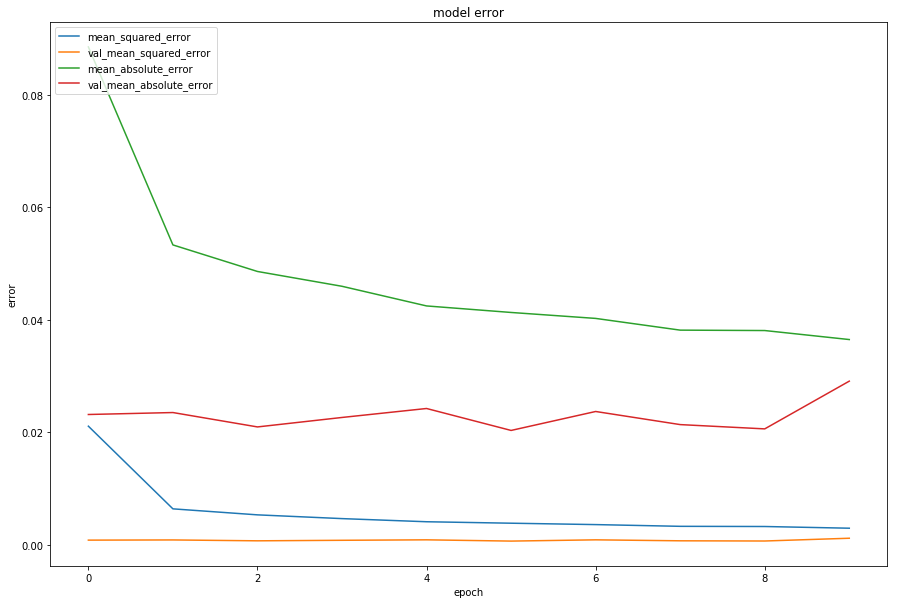

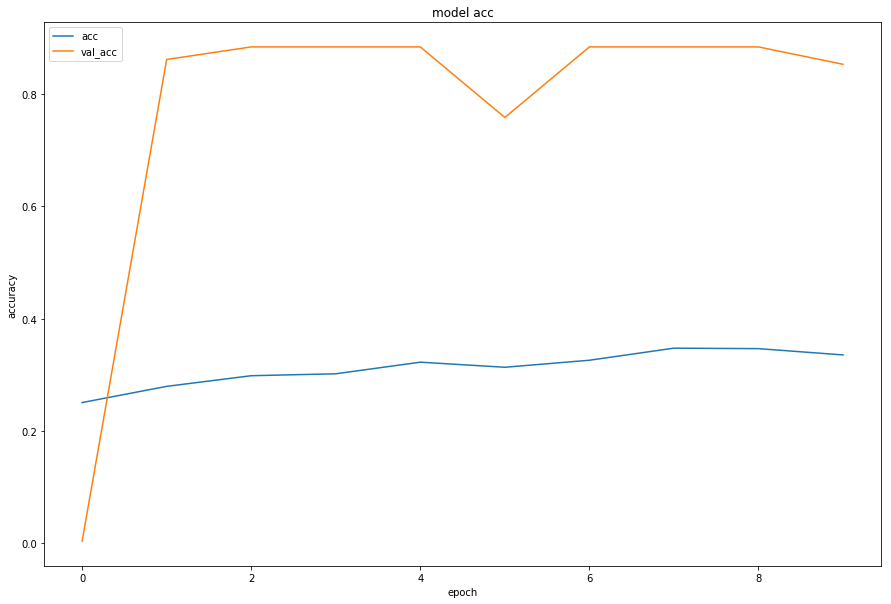

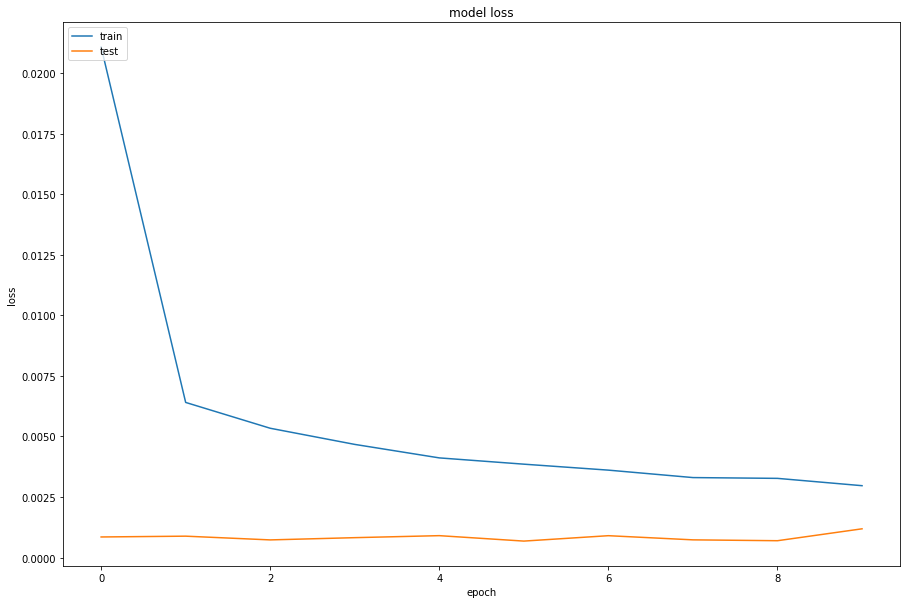

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(15,10))
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['mean_squared_error','val_mean_squared_error','mean_absolute_error','val_mean_absolute_error'], loc='upper left')
plt.show()

plt.figure(figsize=(15,10))
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Test1 Zone**

In [0]:
x_test = list()
print(len(Close))
for i in range(2501,3001,1):
  x_test.append(list(train[i:i+n_steps])) #100
x_input = array(x_test)
print(len(x_input))
#print((x_input))
x_input = x_input.reshape((500, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
#print(yhat)

3100
500


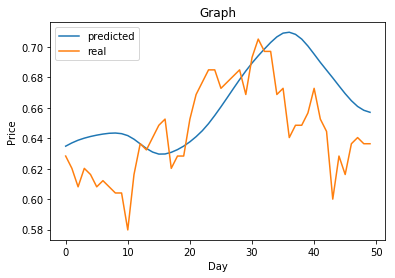

In [0]:
plt.plot([i[0] for i in yhat[-50:]])
plt.plot([i[0] for i in train[-50:]])
plt.title('Graph')
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend(['predicted', 'real'], loc='upper left')
plt.show()

**Test2 Zone**

In [0]:
x_test = list()
x_test.append(train[-n_steps:])
x_input = array(x_test)
#print(len(x_input))
#print((x_input))
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print("Close = "+str(Close[-1:]) )
#print("Open = "+str(Open[-1:]) )
#print("train = "+str(train[-1:]) )
#print(yhat[0])
fuck = list(yhat[0])
#print([fuck])
fuck = sc.inverse_transform([fuck])[0][0]
print("Tomorrow's price of "+stock_name_list[0]+ ": " + str(fuck))

Close = [220.0]
Tomorrow's price of ADVANC.BK: 225.1062621176243


**Tese3 Zone**

3100


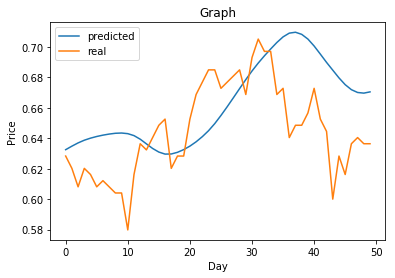

In [0]:
import numpy as np
x_test = list()
print(len(Close))
yhat2list= []
for i in range(2500,3000,1):
  if i < 2995:
    x_test = list()
    x_test.append(train[i:i+n_steps]) #100
    x_test = array(x_test)
    x_test = x_test.tolist()
    #print(x_test)
  else:
    x_test[0].pop(0)
    #yhat2 = yhat2.tolist()
    #print(yhat2[0])
    x_test[0].append(yhat2[0])
  x_input = array(x_test)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat2 = model.predict(x_input, verbose=0)
  yhat2list.append(yhat2)
#print(yhat2list)
#print((x_input))

#yhat = model.predict(x_input, verbose=0)
#print(yhat)


plt.plot([i[0][0] for i in yhat2list[-50:]])
plt.plot([i[0] for i in train[-50:]])
plt.title('Graph')
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend(['predicted', 'real'], loc='upper left')
plt.show()